In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import Imputer

from sklearn.utils.estimator_checks import check_estimator

from sklearn.cross_validation import cross_val_score

In [2]:
trn_all = pd.read_csv('../data/train.csv')  # column #0 in our file is index

#selected features and Cut off outliers of Expected >= 69
#trn_new = trn_all[trn_all['Expected']<69]
trn_new = trn_all

#combine observations with same ID by using mean
#replace Nan by overall mean
trn_mean = trn_new.groupby(trn_new.Id).agg(['mean', 'median', 'std', 'count', 'min', 'max'])
trn_mean.columns = ['_'.join(col).strip() for col in trn_mean.columns.values]
trn_mean = trn_mean.drop(['Expected_count', 'Expected_median', 'Expected_std', 'Expected_min', 'Expected_max'], axis =1)

del trn_all
del trn_new

In [3]:
# ignore id's where all Ref vales are NaN
trn_mean = trn_mean[pd.notnull(trn_mean.Ref_mean)]

# Imputing
index2 = list(trn_mean)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

trn_mean= pd.DataFrame(imp.fit_transform(trn_mean),index = trn_mean.index, columns=index2)

In [4]:
# data preparation
X = trn_mean.loc[:,'minutes_past_mean':'Kdp_5x5_90th_max']
y = trn_mean.loc[:,'Expected_mean']

del trn_mean

In [5]:
X.loc[:,'Zdr_mean']

Id
2          0.380208
4         -1.125000
7          0.584581
8          1.156250
10         0.255208
11         0.482143
12         1.162500
14         0.196429
15         0.489583
17        -0.140625
18         0.236111
19         0.584581
24         0.653409
27        -0.312500
28         0.584581
29         0.755208
32         0.250000
33         0.533654
34        -0.359375
35         0.166667
36        -1.937500
37         0.375000
38         0.269231
39         0.302083
40         0.584581
41         0.555556
42         0.584581
45         0.584581
51         0.354167
55         0.584581
             ...   
1180897    0.584581
1180898   -0.421875
1180899    0.411458
1180901    0.584581
1180904    0.625000
1180909   -0.250000
1180910    0.778409
1180911   -0.812500
1180912    0.584581
1180913   -1.006944
1180915    0.584581
1180918    0.162500
1180919    1.229167
1180920    0.584581
1180921    0.762500
1180922    1.750000
1180923    0.346591
1180924    0.584581
1180925   -0.5625

In [67]:
X.loc[:,'Kdp_mean']

Id
2         -0.288187
4          7.029999
7          0.043955
8          0.002499
10        -1.404172
11        -1.450004
12         0.067993
14        -0.590005
15         1.526660
17        -0.617503
18         0.675549
19         0.043955
24        -0.573642
27         2.939996
28         0.043955
29         1.183997
32         1.964165
33        -0.113852
34         0.356664
35         1.122494
36         0.043955
37         0.043955
38         0.539228
39        -1.410004
40         0.043955
41         0.351246
42         0.043955
45         0.043955
51         1.436656
55         0.043955
             ...   
1180897    0.043955
1180898   -1.240006
1180899    0.789995
1180901    0.043955
1180904   -0.365002
1180909    0.043955
1180910   -0.281004
1180911   -0.172504
1180912    0.043955
1180913   -0.564001
1180915    0.043955
1180918    0.737997
1180919   -1.686676
1180920    0.043955
1180921    1.056666
1180922   -7.750000
1180923   -0.218185
1180924    0.043955
1180925    0.0439

In [78]:
from KDP_ZDR import KDPZDRRegressor
import matplotlib.pyplot as plt
# plot plots inline
%matplotlib inline  

scale = np.arange(0.001,0.006,0.0005)
indexes = range(0,len(scale))
#print indexes
#print scale

In [79]:
MAE = []
for idx in indexes: 
    estimator=KDPZDRRegressor(kdpzdr_aa_scaling=scale[idx],kdpzdr_bb_scaling=1,kdpzdr_cc_scaling=1) 
    estimator.fit(X = X, y =y)
    y_est = estimator.predict(X = X)
    MAE.append(sum(abs(y- y_est))/ len(y))
    #print scaling, MAE

opt = MAE.index(min(MAE))
scale[opt] #best parameter: 0.003,1,1

0.0030000000000000001

In [80]:
y_est

Id
2           0.000000
4          10.363448
7           0.024725
8           0.001057
10          0.000000
11          0.000000
12          0.025778
14          0.000000
15          0.816100
17          0.000000
18          0.438008
19          0.024725
24          0.000000
27          2.609975
28          0.024725
29          0.535692
32          1.219545
33          0.000000
34          0.349357
35          0.749571
36          0.130153
37          0.028384
38          0.344554
39          0.000000
40          0.024725
41          0.188436
42          0.024725
45          0.024725
51          0.841254
55          0.024725
             ...    
1180897     0.024725
1180898     0.000000
1180899     0.454072
1180901     0.024725
1180904     0.000000
1180909     0.042838
1180910     0.000000
1180911     0.000000
1180912     0.024725
1180913     0.000000
1180915     0.024725
1180918     0.500845
1180919     0.000000
1180920     0.024725
1180921     0.477527
1180922     0.000000
1180923   

In [81]:
print(scale[opt])
print(MAE)
print('\n')
print(min(MAE))

0.003
[23.960833026550976, 23.951679520941386, 23.945848051745308, 23.942594078581195, 23.941455011504324, 23.942040446458755, 23.944115069359857, 23.94743574301318, 23.951863804337219, 23.957291925864361]


23.9414550115


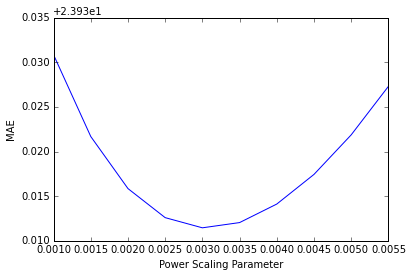

In [82]:
plt.plot(scale, MAE)
plt.xlabel("Power Scaling Parameter")
plt.ylabel("MAE")

In [ ]:
#trn_withRef_comb['KDP'] = pow(pow(10, trn_withRef_comb['Ref_mean']/10)/200, 0.625 * 0.82)

#KDP
kdp_aa = 4.06
kdp_bb = 0.0866
kdp_aa_scaling=0.33
kdp_bb_scaling=0.79
trn_withRef_comb['KDP']=np.sign(trn_withRef_comb['Kdp_mean'])*(kdp_aa*kdp_aa_scaling)*pow(np.abs(trn_withRef_comb['Kdp_mean']),kdp_bb*kdp_bb_scaling)

#KDP_ZDR
kdpzdr_aa = 13.6
kdpzdr_bb = 0.0968
kdpzdr_cc = -0.286
kdpzdr_aa_scaling=0.003
trn_withRef_comb['KDP_ZDR'] = np.sign(trn_withRef_comb['Kdp_mean'])*(kdpzdr_aa*kdpzdr_aa_scaling)*pow(np.abs(trn_withRef_comb['Kdp_mean']),kdpzdr_bb)*pow(pow(10,trn_withRef_comb['Zdr_mean']/10),kdpzdr_cc)

#REF_ZDR
refzdr_aa = 0.00746
refzdr_bb = 0.945
refzdr_cc = -4.76

refzdr_aa_scaling=0.0017
refzdr_bb_scaling=0.9
refzdr_cc_scaling=0.8
trn_withRef_comb['REF_ZDR'] = (refzdr_aa*refzdr_aa_scaling)*pow(pow(10,trn_withRef_comb['Ref_mean']/10),refzdr_bb*refzdr_bb_scaling)*pow(pow(10,trn_withRef_comb['Zdr_mean']/10),refzdr_cc*refzdr_cc_scaling)
